## Prediction of insurance cost of individuals

### Importing data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df=data.copy()

In [5]:
data=data.values

In [6]:
data

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [7]:
x=data[:,0:-1]

In [8]:
x

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [9]:
y=data[:,-1]

In [10]:
y

array([16884.924, 1725.5523, 4449.462, ..., 1629.8335, 2007.945,
       29141.3603], dtype=object)

### Train Test split

In [11]:
from sklearn import model_selection as ml
from sklearn import linear_model as lm

In [12]:
x_train,x_test,y_train,y_test=ml.train_test_split(x,y,random_state=1)

In [13]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1003, 6) (335, 6) (1003,) (335,)


### Regression Analysis

In [14]:
x_train=pd.DataFrame(x_train,columns=['age','sex','bmi','children','smoker','region'])

In [15]:
x_train

,age,sex,bmi,children,smoker,region
0,28,female,25.8,0,no,southwest
1,21,male,25.745,2,no,northeast
2,41,male,40.26,0,no,southeast
3,63,male,33.66,3,no,southeast
4,64,male,26.41,0,no,northeast
...,...,...,...,...,...,...
998,60,male,28.9,0,no,southwest
999,26,female,29.355,2,no,northeast
1000,51,female,34.96,2,yes,northeast
1001,40,female,22.22,2,yes,southeast


In [16]:
x_train['sex']=x_train['sex'].replace({'male':1,'female':0})
x_train['smoker']=x_train['smoker'].replace({'yes':1,'no':0})

In [17]:
x_train[['north','east']]=x_train['region'].str.split('th',expand=True)

In [18]:
x_train

,age,sex,bmi,children,smoker,region,north,east
0,28,0,25.8,0,0,southwest,sou,west
1,21,1,25.745,2,0,northeast,nor,east
2,41,1,40.26,0,0,southeast,sou,east
3,63,1,33.66,3,0,southeast,sou,east
4,64,1,26.41,0,0,northeast,nor,east
...,...,...,...,...,...,...,...,...
998,60,1,28.9,0,0,southwest,sou,west
999,26,0,29.355,2,0,northeast,nor,east
1000,51,0,34.96,2,1,northeast,nor,east
1001,40,0,22.22,2,1,southeast,sou,east


In [19]:
x_train.drop('region',axis=1,inplace=True)

In [20]:
x_train['north']=x_train['north'].replace({'nor':1,'sou':0})
x_train['east']=x_train['east'].replace({'east':1,'west':0})

In [21]:
x_train

,age,sex,bmi,children,smoker,north,east
0,28,0,25.8,0,0,0,0
1,21,1,25.745,2,0,1,1
2,41,1,40.26,0,0,0,1
3,63,1,33.66,3,0,0,1
4,64,1,26.41,0,0,1,1
...,...,...,...,...,...,...,...
998,60,1,28.9,0,0,0,0
999,26,0,29.355,2,0,1,1
1000,51,0,34.96,2,1,1,1
1001,40,0,22.22,2,1,0,1


### Fitting basic model

In [22]:
algo=lm.LinearRegression()

In [23]:
algo.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=algo.predict(x_train)
res=y_train-y_pred

### Intercept and parameters

In [25]:
print(algo.intercept_,algo.coef_)

-11920.113502393022 [ 2.51741858e+02 -2.66637462e+02  3.21288485e+02  3.56822954e+02
  2.40861883e+04  6.45917174e+02  1.67644184e+01]


### Adequecy cheak of model and Interprate results of residual analysis

In [26]:
import matplotlib.pyplot as plt

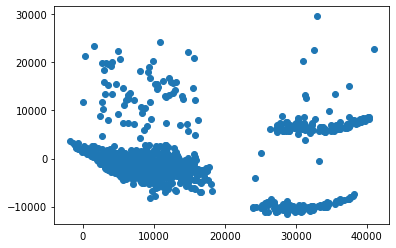

In [27]:
plt.scatter(y_pred,res)

Residuals are clustered in seemingly three different subgroups. So they are needed to be seperately investigated. Below plot distinguishes clusters with different colours

In [28]:
filt1=y_pred<20000
filt2=y_pred>20000
filt3=res>0
filt4=res<0

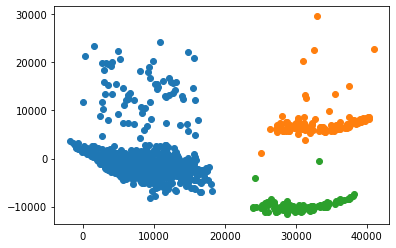

In [29]:
plt.scatter(y_pred[filt1],res[filt1])
plt.scatter(y_pred[filt2 & filt3],res[filt2 & filt3])
plt.scatter(y_pred[filt2 & filt4],res[filt2 & filt4])

In [30]:
x_train[filt1]

,age,sex,bmi,children,smoker,north,east
0,28,0,25.8,0,0,0,0
1,21,1,25.745,2,0,1,1
2,41,1,40.26,0,0,0,1
3,63,1,33.66,3,0,0,1
4,64,1,26.41,0,0,1,1
...,...,...,...,...,...,...,...
996,19,0,39.615,1,0,1,0
997,23,1,50.38,1,0,0,1
998,60,1,28.9,0,0,0,0
999,26,0,29.355,2,0,1,1


In [31]:
x_train[filt1]['smoker'].value_counts()

0    791
Name: smoker, dtype: int64

It indicates the blue cluster in above plot are the non smokers.

In [32]:
filt1=(x_train['smoker']==1)&(res>0)

In [33]:
filt2=(x_train['smoker']==1)&(res<0)

In [34]:
x_train[filt1]

,age,sex,bmi,children,smoker,north,east
5,47,1,36.19,0,1,0,1
7,41,1,35.75,1,1,0,1
10,25,1,33.33,2,1,0,1
18,43,0,46.2,0,1,0,1
31,28,1,36.4,1,1,0,0
...,...,...,...,...,...,...,...
977,24,1,32.7,0,1,0,0
982,62,1,32.015,0,1,1,1
983,54,1,34.21,2,1,0,1
989,45,1,30.36,0,1,0,1


In [35]:
x_train[filt1]['children'].value_counts()

0    57
2    24
1    23
3    14
4     1
Name: children, dtype: int64

In [36]:
x_train[filt2]['children'].value_counts()

0    36
1    25
2    16
3    14
4     1
5     1
Name: children, dtype: int64

### For non smokers

In [37]:
x_train_0=x_train[x_train['smoker']==0]
y_train_0=y_train[x_train['smoker']==0]
x_train_0=x_train_0.drop('smoker',axis=1)

In [38]:
algo1=lm.LinearRegression()
algo1.fit(x_train_0,y_train_0)
y_pred_0=algo1.predict(x_train_0)
res=y_train_0-y_pred_0

####  Residual analysis for non smokers

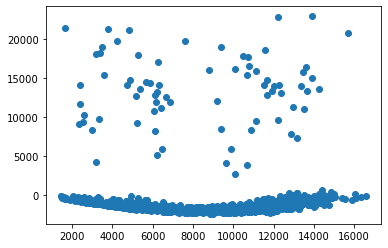

In [39]:
plt.scatter(y_pred_0,res)

1) A number of outliers present.
2) The convex (downword) shape indicates non linearity

#### Adding square of independent variables

In [40]:
algo1.coef_

array([ 262.18560488, -711.23420036,   13.71223051,  523.23182653,
        882.01890018,  247.91064108])

In [41]:
x_train_0

,age,sex,bmi,children,north,east
0,28,0,25.8,0,0,0
1,21,1,25.745,2,1,1
2,41,1,40.26,0,0,1
3,63,1,33.66,3,0,1
4,64,1,26.41,0,1,1
...,...,...,...,...,...,...
996,19,0,39.615,1,1,0
997,23,1,50.38,1,0,1
998,60,1,28.9,0,0,0
999,26,0,29.355,2,1,1


In [42]:
x_train_0['age2']=x_train_0['age']*x_train_0['age']
#x_train_0['bmi2']=x_train_0['bmi']*x_train_0['bmi']
#x_train_0['children2']=x_train_0['children']*x_train_0['children']

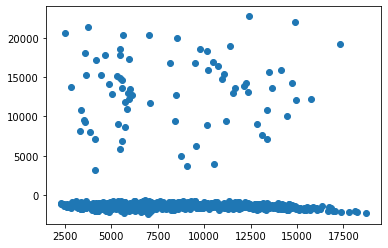

In [43]:
algo1.fit(x_train_0,y_train_0)
y_pred_01=algo1.predict(x_train_0)
res01=y_train_0-y_pred_01
plt.scatter(y_pred_01,res01)

Adding age*age makes residuals linear

#### Seperating outliers and final fitting 

In [44]:
x_train_0

,age,sex,bmi,children,north,east,age2
0,28,0,25.8,0,0,0,784
1,21,1,25.745,2,1,1,441
2,41,1,40.26,0,0,1,1681
3,63,1,33.66,3,0,1,3969
4,64,1,26.41,0,1,1,4096
...,...,...,...,...,...,...,...
996,19,0,39.615,1,1,0,361
997,23,1,50.38,1,0,1,529
998,60,1,28.9,0,0,0,3600
999,26,0,29.355,2,1,1,676


In [45]:
algo1.coef_

array([ -86.46746113, -717.13756509,   13.12876234,  693.52103948,
        892.07960107,  186.10616697,    4.40599332])

In [46]:
x_train_0[res01>2000]

,age,sex,bmi,children,north,east,age2
38,50,0,27.36,0,1,1,2500
49,48,1,36.67,1,1,0,2304
50,53,0,38.06,3,0,1,2809
66,49,0,27.1,1,0,0,2401
72,25,0,41.325,0,1,1,625
...,...,...,...,...,...,...,...
876,18,1,39.14,0,1,1,324
890,19,1,27.265,2,1,0,361
958,52,1,36.765,2,1,0,2704
965,33,1,42.46,1,0,1,1089


In [47]:
x_train_0=x_train_0[res01<2000]
y_train_0=y_train_0[res01<2000]

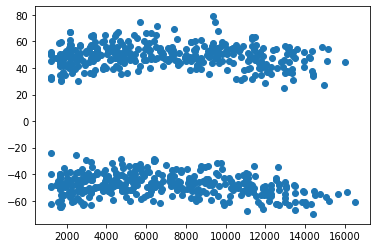

In [48]:
algo1.fit(x_train_0,y_train_0)
y_pred_02=algo1.predict(x_train_0)
res02=y_train_0-y_pred_02
plt.scatter(y_pred_02,res02)

In [49]:
x_train_0[res02<0]

,age,sex,bmi,children,north,east,age2
2,41,1,40.26,0,0,1,1681
3,63,1,33.66,3,0,1,3969
6,19,0,32.11,0,1,0,361
9,42,0,29.48,2,0,1,1764
11,32,1,27.835,1,1,0,1024
...,...,...,...,...,...,...,...
991,24,0,27.72,0,0,1,576
993,28,1,30.875,0,1,0,784
996,19,0,39.615,1,1,0,361
997,23,1,50.38,1,0,1,529


In [50]:
(x_train_0[res02<0]['east']!=x_train_0[res02<0]['north']).value_counts()

True    362
dtype: int64

In [51]:
x_train_0[res02>0]

,age,sex,bmi,children,north,east,age2
0,28,0,25.8,0,0,0,784
1,21,1,25.745,2,1,1,441
4,64,1,26.41,0,1,1,4096
8,26,1,23.7,2,0,0,676
14,55,0,37.1,0,0,0,3025
...,...,...,...,...,...,...,...
981,64,1,25.6,2,0,0,4096
992,24,0,25.27,0,1,1,576
994,38,1,34.7,2,0,0,1444
998,60,1,28.9,0,0,0,3600


In [52]:
(x_train_0[res02>0]['east']==x_train_0[res02>0]['north']).value_counts()

True    354
dtype: int64

### Conclusion

    During final fitting of non smokers data residual analysis shows that data further divided in two groups. One group has residuals approximately normally and randomly distributed around +50 and another approximately normally and randomly distributed around -50.
    Further exploratory observations reveals that data with same value in north and east column has approximately +50 residuals. Whereas with opposite values in north and east column has approximately -50 residuals.

### For smokers

In [53]:
x_train_1=x_train[x_train['smoker']==1]
y_train_1=y_train[x_train['smoker']==1]
x_train_1=x_train_1.drop('smoker',axis=1)

In [54]:
#x_train_1['age2']=x_train_1['age']*x_train_1['age']
#x_train_1['bmi2']=x_train_1['bmi']*x_train_1['bmi']
#x_train_1['children2']=x_train_1['children']*x_train_1['children']

In [55]:
x_train_1

,age,sex,bmi,children,north,east
5,47,1,36.19,0,0,1
7,41,1,35.75,1,0,1
10,25,1,33.33,2,0,1
18,43,0,46.2,0,0,1
19,19,1,26.03,1,1,0
...,...,...,...,...,...,...
988,39,1,29.925,1,1,1
989,45,1,30.36,0,0,1
995,30,1,28.69,3,1,0
1000,51,0,34.96,2,1,1


#### Fit linear regression and residual analysis

From the very first fit we got very good distinction between rest of two clusters. So we used same model parameters to get the same result. By filtering we divide total data of smokers in two subgroups on the basis of residual clusters. But actually how indipendent features results to a cluster that was unclear in spite of careful observations.

In [56]:
algo2=lm.LinearRegression()
algo2.fit(x_train_1,y_train_1)
algo2.intercept_=24214-12658
algo2.coef_=np.array([251.7,193.7,338,361,654,218.9])
y_pred_1=algo2.predict(x_train_1)
res1=y_train_1-y_pred_1

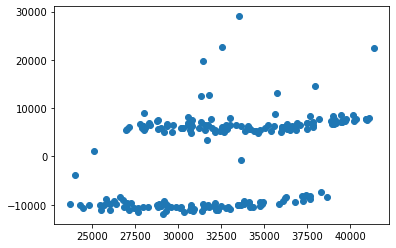

In [57]:
plt.scatter(y_pred_1,res1)

In [58]:
algo2.score(x_train_1,y_train_1)

0.3716770405645605

##### Lebel data with 0 and 1 for the two different clusters

In [59]:
x_train_1['res']=pd.Series(np.zeros(1003,dtype='int8'))

In [60]:
x_train_1

,age,sex,bmi,children,north,east,res
5,47,1,36.19,0,0,1,0
7,41,1,35.75,1,0,1,0
10,25,1,33.33,2,0,1,0
18,43,0,46.2,0,0,1,0
19,19,1,26.03,1,1,0,0
...,...,...,...,...,...,...,...
988,39,1,29.925,1,1,1,0
989,45,1,30.36,0,0,1,0
995,30,1,28.69,3,1,0,0
1000,51,0,34.96,2,1,1,0


In [61]:
x_train_1['res']=1
x_train_1.loc[res1<0,'res']=0

In [62]:
x_train_1

,age,sex,bmi,children,north,east,res
5,47,1,36.19,0,0,1,1
7,41,1,35.75,1,0,1,1
10,25,1,33.33,2,0,1,1
18,43,0,46.2,0,0,1,1
19,19,1,26.03,1,1,0,0
...,...,...,...,...,...,...,...
988,39,1,29.925,1,1,1,0
989,45,1,30.36,0,0,1,1
995,30,1,28.69,3,1,0,0
1000,51,0,34.96,2,1,1,1


#### Determine the basis vector along which data are clustered using logistic regression

In [63]:
y_log=x_train_1['res'].copy()

In [64]:
x_train_1.drop('res',axis=1,inplace=True)
x_train_1

,age,sex,bmi,children,north,east
5,47,1,36.19,0,0,1
7,41,1,35.75,1,0,1
10,25,1,33.33,2,0,1
18,43,0,46.2,0,0,1
19,19,1,26.03,1,1,0
...,...,...,...,...,...,...
988,39,1,29.925,1,1,1
989,45,1,30.36,0,0,1
995,30,1,28.69,3,1,0
1000,51,0,34.96,2,1,1


In [65]:
algo_log=lm.LogisticRegression()
algo_log.fit(x_train_1,y_log)

LogisticRegression()

##### Evaluating the logistic regression model

In [66]:
y_logpred=algo_log.predict(x_train_1)
from sklearn.metrics import confusion_matrix as cm
cm(y_log,y_logpred)

array([[ 86,   7],
       [  6, 113]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report as cr

In [107]:
print(cr(y_log,y_logpred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        93
           1       0.94      0.95      0.95       119

    accuracy                           0.94       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.94      0.94      0.94       212



In [67]:
from sklearn.metrics import plot_roc_curve as prc

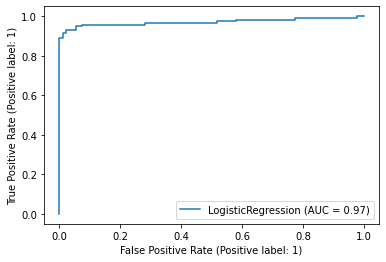

In [68]:
prc(algo_log,x_train_1,y_log)

#### Fitting linear regression seperately to the cluster-1(lebelled 0 in logistic regression) and their residual analysis

In [69]:
x_train_1['age2']=x_train_1['age']*x_train_1['age']

In [70]:
algo2.fit(x_train_1[res1<0],y_train_1[res1<0])

LinearRegression()

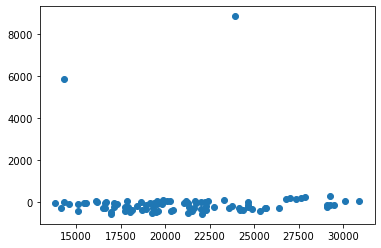

In [71]:
y_pred_1a=algo2.predict(x_train_1[res1<0])
res1a=y_train_1[res1<0]-y_pred_1a
plt.scatter(y_pred_1a,res1a)

We got an outlier. so it is needed to exclude the point and refit regression.

In [72]:
x_train_1a=x_train_1[(res1<0)][(res1a<1000)]
y_train_1a=y_train_1[(res1<0)][(res1a<1000)]

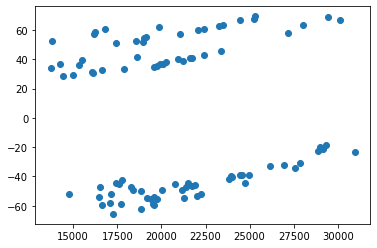

In [73]:
algo2.fit(x_train_1a,y_train_1a)
y_pred_1a=algo2.predict(x_train_1a)
res1a=y_train_1a-y_pred_1a
plt.scatter(y_pred_1a,res1a)

Again we end up reaching two different clusters. so we seperate them and fit regression seperately.

In [74]:
x_train_1a[res1a<0]

,age,sex,bmi,children,north,east,age2
19,19,1,26.03,1,1,0,361
32,45,1,22.895,2,1,0,2025
34,48,1,24.42,0,0,1,2304
35,52,1,27.36,0,1,0,2704
65,26,1,27.06,0,0,1,676
74,63,0,26.98,0,1,0,3969
95,43,1,20.13,2,0,1,1849
111,52,0,24.13,1,1,0,2704
193,43,0,24.7,2,1,0,1849
199,29,0,27.94,1,0,1,841


Adequete fit achived as most of residuals lies between -1 and +1.

#### Fitting regression to cluster-2

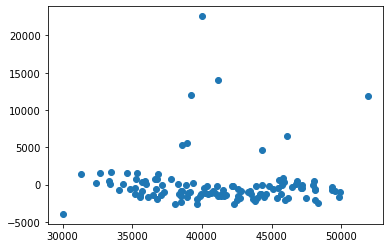

In [75]:
algo3=lm.LinearRegression()
algo3.fit(x_train_1[res1>0],y_train_1[res1>0])
y_pred_1b=algo3.predict(x_train_1[res1>0])
res1b=y_train_1[res1>0]-y_pred_1b
plt.scatter(y_pred_1b,res1b)

In [76]:
x_train_1b=x_train_1[(res1>0)][(res1b<3000)&(res1b>-3000)]
y_train_1b=y_train_1[(res1>0)][(res1b<3000)&(res1b>-3000)]

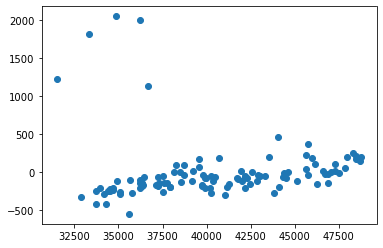

In [77]:
algo3.fit(x_train_1b,y_train_1b)
y_pred_1b=algo3.predict(x_train_1b)
res1b=y_train_1b-y_pred_1b
plt.scatter(y_pred_1b,res1b)

we got adequete fit as most of the residuals lies between 500 and -500.

### Final model and predictions

1) Is perticipant smoker?
2) If No, pass data to algo1
    2.1) If north and east are equal, add 50 otherwise add -50.
3) If Yes, pass to algo_log
    3.1) If 0 pass to algo2
    3.3) If 1 pass to algo3

In [78]:
dftest=pd.DataFrame(x_test,columns=['age','sex','bmi','children','smoker','region'])
dftest

,age,sex,bmi,children,smoker,region
0,19,male,35.53,0,no,northwest
1,57,male,31.54,0,no,northwest
2,51,male,37.0,0,no,southwest
3,49,female,36.63,3,no,southeast
4,21,male,22.3,1,no,southwest
...,...,...,...,...,...,...
330,58,female,32.395,1,no,northeast
331,58,male,38.0,0,no,southwest
332,52,female,30.875,0,no,northeast
333,22,male,28.88,0,no,northeast


In [79]:
dftest[['north','east']]=dftest['region'].str.split('th',expand=True)

In [80]:
dftest

,age,sex,bmi,children,smoker,region,north,east
0,19,male,35.53,0,no,northwest,nor,west
1,57,male,31.54,0,no,northwest,nor,west
2,51,male,37.0,0,no,southwest,sou,west
3,49,female,36.63,3,no,southeast,sou,east
4,21,male,22.3,1,no,southwest,sou,west
...,...,...,...,...,...,...,...,...
330,58,female,32.395,1,no,northeast,nor,east
331,58,male,38.0,0,no,southwest,sou,west
332,52,female,30.875,0,no,northeast,nor,east
333,22,male,28.88,0,no,northeast,nor,east


In [81]:
dftest.drop('region',axis=1,inplace=True)
dftest['sex']=dftest['sex'].replace({'male':1,'female':0})
dftest['north']=dftest['north'].replace({'nor':1,'sou':0})
dftest['east']=dftest['east'].replace({'east':1,'west':0})

In [82]:
dftest['smoker'].value_counts()

no     273
yes     62
Name: smoker, dtype: int64

In [83]:
dftest

,age,sex,bmi,children,smoker,north,east
0,19,1,35.53,0,no,1,0
1,57,1,31.54,0,no,1,0
2,51,1,37.0,0,no,0,0
3,49,0,36.63,3,no,0,1
4,21,1,22.3,1,no,0,0
...,...,...,...,...,...,...,...
330,58,0,32.395,1,no,1,1
331,58,1,38.0,0,no,0,0
332,52,0,30.875,0,no,1,1
333,22,1,28.88,0,no,1,1


In [84]:
dftest1=dftest[dftest['smoker']=='no'].copy()
dftest1

,age,sex,bmi,children,smoker,north,east
0,19,1,35.53,0,no,1,0
1,57,1,31.54,0,no,1,0
2,51,1,37.0,0,no,0,0
3,49,0,36.63,3,no,0,1
4,21,1,22.3,1,no,0,0
...,...,...,...,...,...,...,...
330,58,0,32.395,1,no,1,1
331,58,1,38.0,0,no,0,0
332,52,0,30.875,0,no,1,1
333,22,1,28.88,0,no,1,1


In [85]:
dftest2=dftest[dftest['smoker']=='yes'].copy()
dftest2

,age,sex,bmi,children,smoker,north,east
5,31,1,34.39,3,yes,1,0
9,37,0,26.4,0,yes,0,1
21,30,0,39.05,3,yes,0,1
32,53,0,22.61,3,yes,1,1
33,19,1,31.92,0,yes,1,0
...,...,...,...,...,...,...,...
295,43,0,26.885,0,yes,1,0
305,36,1,28.025,1,yes,1,1
312,38,1,19.3,0,yes,0,0
321,18,1,17.29,2,yes,1,1


In [86]:
dftest1.drop('smoker',axis=1,inplace=True)
dftest2.drop('smoker',axis=1,inplace=True)

In [87]:
dftest1['age2']=dftest1['age']*dftest1['age']

In [88]:
dftest1['predict']=algo1.predict(dftest1)

In [89]:
dftest1

,age,sex,bmi,children,north,east,age2,predict
0,19,1,35.53,0,1,0,361,1688.041010
1,57,1,31.54,0,1,0,3249,11403.940155
2,51,1,37.0,0,0,0,2601,8744.448315
3,49,0,36.63,3,0,1,2401,10425.900451
4,21,1,22.3,1,0,0,441,2067.763370
...,...,...,...,...,...,...,...,...
330,58,0,32.395,1,1,1,3364,12967.296941
331,58,1,38.0,0,0,0,3364,11315.711099
332,52,0,30.875,0,1,1,2704,10153.212295
333,22,1,28.88,0,1,1,484,2197.226802


In [90]:
dftest1.loc[dftest1.east==dftest1.north,'predict']+=50
dftest1.loc[dftest1.east!=dftest1.north,'predict']-=50

In [91]:
dftest2['logistic_predict']=algo_log.predict(dftest2)
dftest2['age2']=dftest2['age']*dftest2['age']

In [92]:
dftest21=dftest2[dftest2['logistic_predict']==1].copy()
dftest22=dftest2[dftest2['logistic_predict']==0].copy()

In [93]:
dftest21.drop('logistic_predict',axis=1,inplace=True)
dftest22.drop('logistic_predict',axis=1,inplace=True)

In [94]:
dftest21['predict']=algo3.predict(dftest21)

In [95]:
dftest21

,age,sex,bmi,children,north,east,age2,predict
5,31,1,34.39,3,1,0,961,38951.215990
21,30,0,39.05,3,0,1,900,40900.757481
33,19,1,31.92,0,1,0,361,34097.743074
36,30,1,35.3,0,0,0,900,36957.000832
39,45,0,30.495,1,1,0,2025,40079.154597
47,28,1,31.68,0,0,1,784,34971.640726
56,43,0,32.56,3,0,1,1849,41104.127741
70,52,1,34.485,3,1,0,2704,44771.210912
71,31,0,38.095,1,1,1,961,40060.337082
75,43,1,34.96,1,1,1,1849,41097.828704


In [96]:
dftest22['predict']=algo2.predict(dftest22)

In [97]:
dftest22.loc[dftest22.east==dftest22.north,'predict']+=40
dftest22.loc[dftest22.east!=dftest22.north,'predict']-=40

In [98]:
returndf=pd.concat([dftest21,dftest22,dftest1])

In [99]:
y_predict=returndf.sort_index()['predict'].values

### Evaluation of prediction

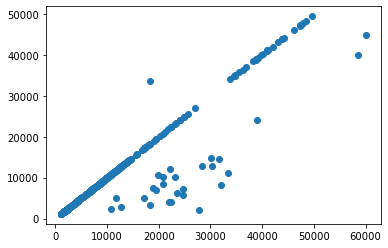

In [100]:
plt.scatter(y_test,y_predict)

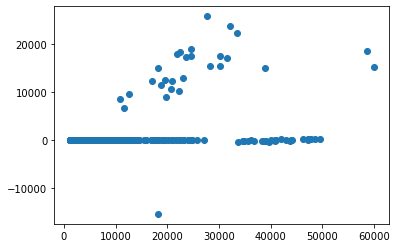

In [101]:
plt.scatter(y_test,y_test-y_predict)

In [102]:
from sklearn.metrics import r2_score as r2

In [103]:
r2(y_test,y_predict)

0.8461953243328887

In [104]:
loss=np.sqrt(np.sum((y_test-y_predict)**2)/y_predict.shape[0])
print(loss)

4548.527514991105


A decent amount of Rsquare value achived